In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('spotify_top_songs_audio_features.csv')

In [32]:
df.head(5)

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


In [33]:
df.isnull().sum()

id                  0
artist_names        0
track_name          0
source              0
key                 0
mode                0
time_signature      0
danceability        0
energy              0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
loudness            0
tempo               0
duration_ms         0
weeks_on_chart      0
streams             0
dtype: int64

In [34]:
df.shape

(6513, 19)

In [35]:
df.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6.513000e+03
mean,0.681731,0.636522,0.121933,0.236761,0.012469,0.180168,0.492412,-6.350667,122.117244,202566.684170,13.614924,1.089647e+08
std,0.141787,0.164813,0.113441,0.244784,0.075151,0.138054,0.227001,2.536114,29.416097,49199.592333,24.084051,2.276695e+08
min,0.150000,0.021800,0.023200,0.000008,0.000000,0.019700,0.032000,-34.475000,46.718000,30133.000000,1.000000,2.525159e+06
25%,0.591000,0.534000,0.044000,0.044400,0.000000,0.097400,0.316000,-7.564000,98.007000,173038.000000,1.000000,8.695060e+06
50%,0.698000,0.651000,0.072200,0.145000,0.000000,0.124000,0.489000,-5.983000,120.034000,198367.000000,4.000000,2.712856e+07
75%,0.785000,0.759000,0.163000,0.356000,0.000041,0.219000,0.669000,-4.673000,142.025000,226003.000000,16.000000,9.951456e+07
max,0.985000,0.989000,0.966000,0.994000,0.953000,0.977000,0.982000,1.509000,212.117000,690732.000000,367.000000,3.528450e+09


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6513 non-null   object 
 1   artist_names      6513 non-null   object 
 2   track_name        6513 non-null   object 
 3   source            6513 non-null   object 
 4   key               6513 non-null   object 
 5   mode              6513 non-null   object 
 6   time_signature    6513 non-null   object 
 7   danceability      6513 non-null   float64
 8   energy            6513 non-null   float64
 9   speechiness       6513 non-null   float64
 10  acousticness      6513 non-null   float64
 11  instrumentalness  6513 non-null   float64
 12  liveness          6513 non-null   float64
 13  valence           6513 non-null   float64
 14  loudness          6513 non-null   float64
 15  tempo             6513 non-null   float64
 16  duration_ms       6513 non-null   int64  


## Q-1 What are the most popular artists in terms of streams?

In [37]:
top_artists = df.groupby('artist_names')['streams'].sum().nlargest(10)
print("Top 10 most popular artists in terms of streams:")
print(top_artists)

Top 10 most popular artists in terms of streams:
artist_names
Taylor Swift      15388585740
Ed Sheeran        13111071610
The Weeknd        11184004532
Bad Bunny         10532229467
Harry Styles       9661158399
Billie Eilish      9633076229
Olivia Rodrigo     8885676876
Ariana Grande      8364532797
Drake              7604179081
Post Malone        7362247507
Name: streams, dtype: int64


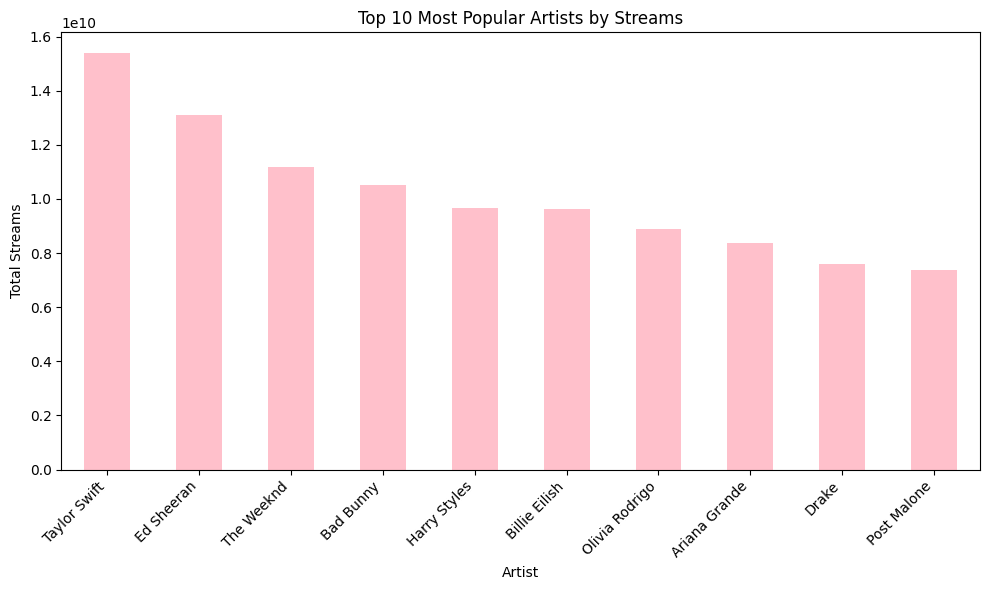

In [38]:
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='#FFC0CB')
plt.title('Top 10 Most Popular Artists by Streams')
plt.xlabel('Artist')
plt.ylabel('Total Streams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Q-2 What is the average duration of songs on Spotify?

In [39]:
average_duration_ms = df['duration_ms'].mean()

# Convert duration from milliseconds to minutes and seconds
average_duration_minutes = average_duration_ms / 60000
average_duration_seconds = (average_duration_minutes - int(average_duration_minutes)) * 60
print(f"The average duration of songs on Spotify is approximately: {int(average_duration_minutes)} minutes and {int(average_duration_seconds)} seconds.")

The average duration of songs on Spotify is approximately: 3 minutes and 22 seconds.


## Q-3 Is there a correlation between the danceability and energy of a song?

In [40]:
df['danceability'].corr(df['energy'])

0.13239744331369757

####  There is little to no meaningful relationship between the danceability and energy of songs in the dataset.

## Q-4 Is there a correlation between energy and loudness of tracks?

In [41]:
df['energy'].corr(df['loudness'])

0.7273789658383438

#### There is a noticeable tendency for energy and loudness to move together, but it's not a perfect relationship.

## Q-5 Are tracks becoming more or less popular as they stay on the chart for longer?

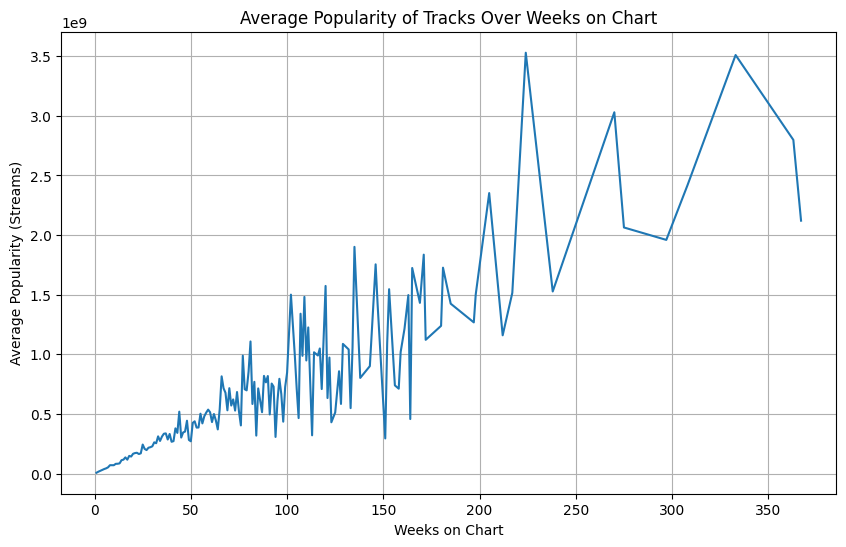

In [42]:
average_popularity_by_week = df.groupby('weeks_on_chart')['streams'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_popularity_by_week, x='weeks_on_chart', y='streams')
plt.title('Average Popularity of Tracks Over Weeks on Chart')
plt.xlabel('Weeks on Chart')
plt.ylabel('Average Popularity (Streams)')
plt.grid(True)
plt.show()

#### As tracks spend more time on the chart, on average, they tend to become more popular, as indicated by the increasing trend in the number of streams.

## Q-6 What are the top 10 tracks with the highest tempo?

In [43]:
# Tempo = Beats per minute
top_10_tempo_tracks = df.nlargest(10, 'tempo')
print("Top 10 tracks with the highest tempo:")
print(top_10_tempo_tracks[['track_name', 'tempo']])

Top 10 tracks with the highest tempo:
                                             track_name    tempo
5284                                            Machika  212.117
616                                     Ricchi x Sempre  211.842
4808  State Of Grace (Acoustic Version) (Taylor's Ve...  208.918
1059                   Mele Kalikimaka - Single Version  207.975
3480          Soon You’ll Get Better (feat. The Chicks)  207.476
4976                                     Last Christmas  205.945
4249                          We Don't Talk About Bruno  205.863
3119                 Lover (Remix) [feat. Shawn Mendes]  205.272
1584                                  Cops Shot The Kid  205.116
3881                                            Love Me  204.132


## Q-7 How many tracks are in major mode versus minor mode?

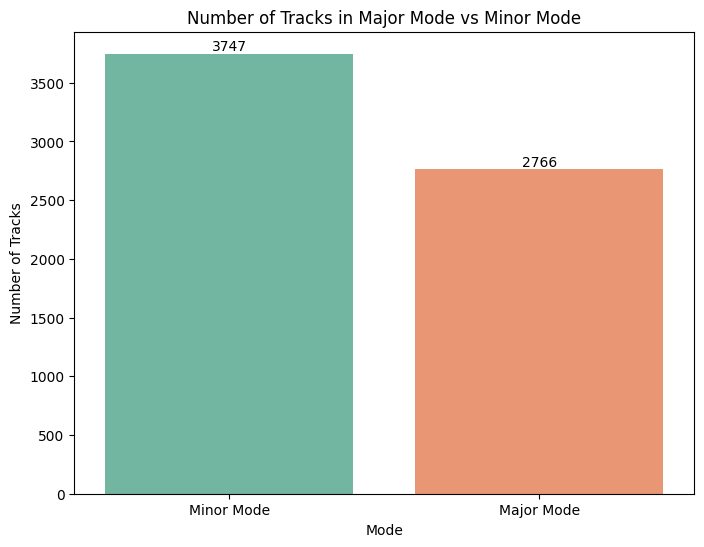

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='mode', hue= 'mode', palette = "Set2", legend=False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Number of Tracks in Major Mode vs Minor Mode')
plt.xlabel('Mode')
plt.ylabel('Number of Tracks')
plt.xticks(ticks=[0, 1], labels=['Minor Mode', 'Major Mode'])
plt.show()

## Q-8 What are the top 10 tracks with the highest number of streams?

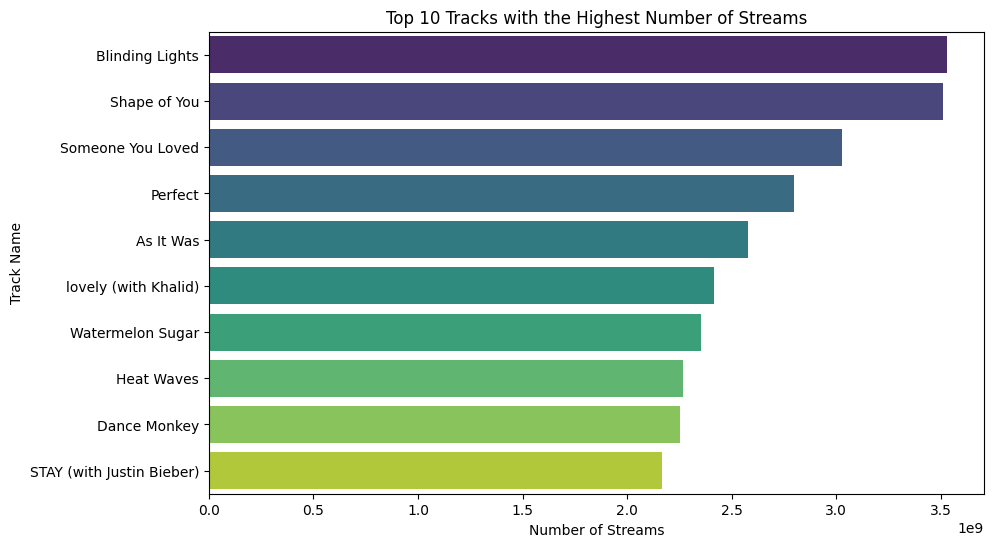

In [45]:
top_10_streams = df.nlargest(10, 'streams')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_streams, x='streams', y='track_name', hue='track_name', palette='viridis')
plt.title('Top 10 Tracks with the Highest Number of Streams')
plt.xlabel('Number of Streams')
plt.ylabel('Track Name')
plt.show()

## Q- 9 What are the top 10 Sources with highest Number of Tracks ?

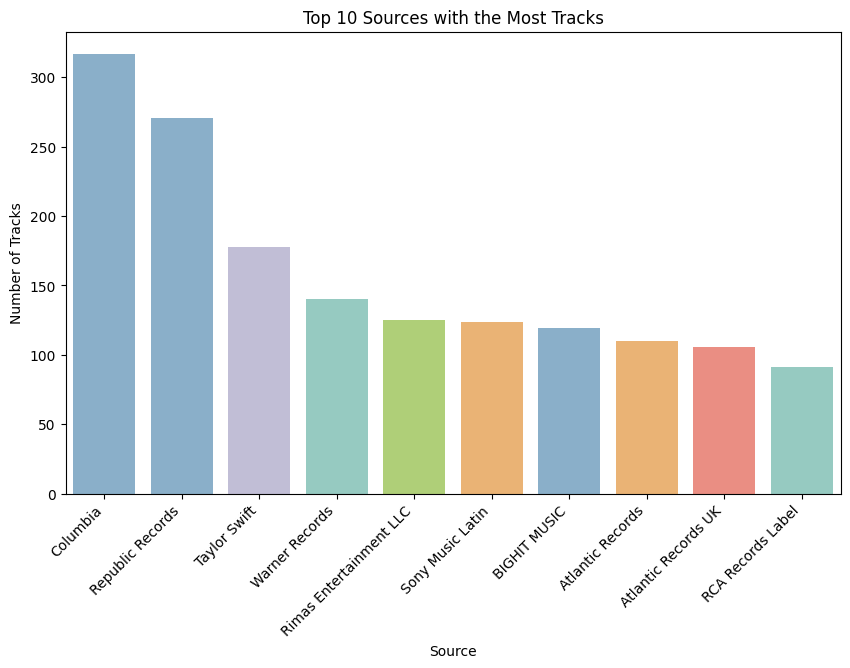

In [46]:
top_10_sources = df['source'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='source', hue= 'source',order=top_10_sources.index, palette='Set3')
plt.title('Top 10 Sources with the Most Tracks')
plt.xlabel('Source')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Q-10 Which artists have the most tracks in the dataset ?

In [47]:
df['artist_names'].value_counts().nlargest(1)

artist_names
Taylor Swift    175
Name: count, dtype: int64

## Q-11 What are the common characteristics shared by Taylor Swift's most popular tracks?

In [48]:
# Filter the dataset to include only Taylor Swift's tracks
taylor_swift_tracks = df[df['artist_names'].str.contains('Taylor Swift')]

# Find the top 10 most streamed tracks by Taylor Swift
top_10_taylor_swift_tracks = taylor_swift_tracks.nlargest(10, 'streams')

# Calculate the average danceability and acousticness of Taylor Swift's top 10 tracks
average_danceability = top_10_taylor_swift_tracks['danceability'].mean()
average_acousticness = top_10_taylor_swift_tracks['acousticness'].mean()
average_enery = top_10_taylor_swift_tracks['energy'].mean()
average_speechiness = top_10_taylor_swift_tracks['speechiness'].mean()
average_liveness = top_10_taylor_swift_tracks['liveness'].mean()
average_valence = top_10_taylor_swift_tracks['valence'].mean()
average_tempo = top_10_taylor_swift_tracks['tempo'].mean()

print("Average Danceability of Taylor Swift's Top 10 Tracks:", average_danceability)
print("Average Acousticness of Taylor Swift's Top 10 Tracks:", average_acousticness)
print("Average Energy of Taylor Swift's Top 10 Tracks:", average_enery)
print("Average Speechiness of Taylor Swift's Top 10 Tracks:", average_speechiness)
print("Average Liveness of Taylor Swift's Top 10 Tracks:", average_liveness)
print("Average Valence of Taylor Swift's Top 10 Tracks:", average_valence)
print("Average Tempo of Taylor Swift's Top 10 Tracks:", average_tempo)

Average Danceability of Taylor Swift's Top 10 Tracks: 0.6033000000000001
Average Acousticness of Taylor Swift's Top 10 Tracks: 0.216195
Average Energy of Taylor Swift's Top 10 Tracks: 0.6191
Average Speechiness of Taylor Swift's Top 10 Tracks: 0.06342
Average Liveness of Taylor Swift's Top 10 Tracks: 0.17855
Average Valence of Taylor Swift's Top 10 Tracks: 0.39371000000000006
Average Tempo of Taylor Swift's Top 10 Tracks: 109.0346


## Q-12 What factors contribute the most to a song being streamed more?

In [49]:
numeric_data = df.drop(columns=['id', 'track_name', 'artist_names', 'source', 'key', 'mode', 'time_signature'])
stream_correlation = numeric_data.corr()['streams'].abs().sort_values(ascending=False)
print("Factors contributing the most to song streams:")
print(stream_correlation[1:]) 

Factors contributing the most to song streams:
weeks_on_chart      0.855880
speechiness         0.085806
liveness            0.039445
valence             0.037192
loudness            0.035809
instrumentalness    0.019188
duration_ms         0.014761
acousticness        0.012926
tempo               0.012052
danceability        0.011551
energy              0.001399
Name: streams, dtype: float64


#### Factors such as the duration a song spends on the chart, its speechiness, liveness, valence, and loudness are the most significant contributors to a song being streamed more.